##Assesment

**Hugging face agent:**
A Large Language model assistant that is good in performing specific action such as : image generation, code completion, and so on.


**Hugging face pipeline for text generation:**
Hugging face can be used for text generation. However, implementing pipeline can automate/ ease up the process in few lines.



```
Import torch
from transformers import pipeline
generate_text= pipeline = (model = "your model's name" , torch_dtype= "data type of your model", trust_remote_code=" set ture if you need to include custom code from the model's repository", device_map="set auto to use device gpu or cpu")
```




**Hugging face endpoint :**
provides you a way to deploy models as APIs. This will allow you to run inference on these models.


**Image generation:**
The process of generating images can be very usefull in many cases. There are many model on hugging face that allows you to do so. Some of the popular models are:
- DALL-E: Very creative, producing diverse and high-quality images.

- Stable Diffusion: Great for generating high-resolution, detailed pictures quickly.

- BigGAN: Efficient at producing large, high-fidelity images.









In [51]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import os
from google.colab import drive

In [52]:
# Mount Google Drive to access files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
# Define the path to the folder containing the images
image_folder = '/content/drive/MyDrive/LLM/images'

# List all files in the directory
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg','avif'))]

# Load images from the file paths
images = [Image.open(image_file) for image_file in image_files]

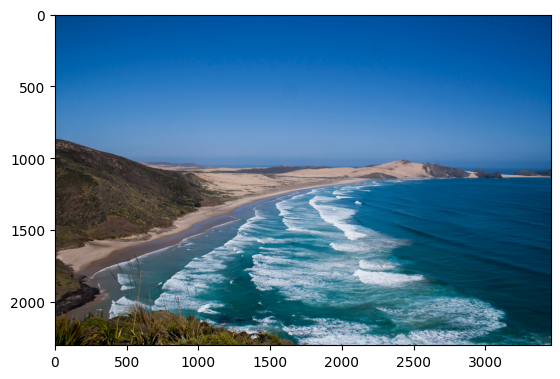

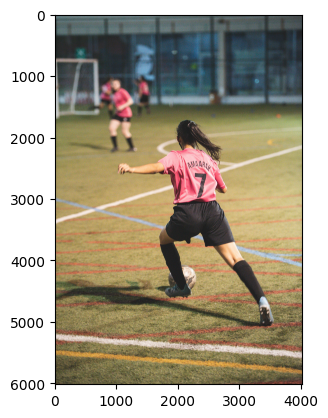

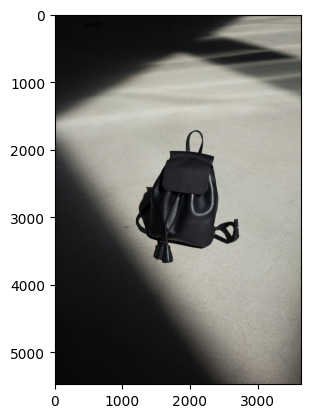

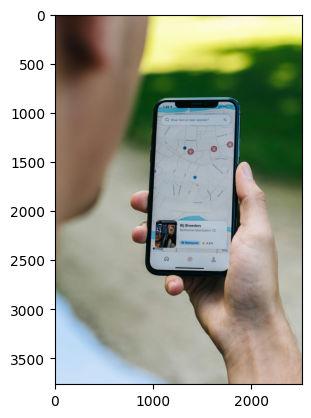

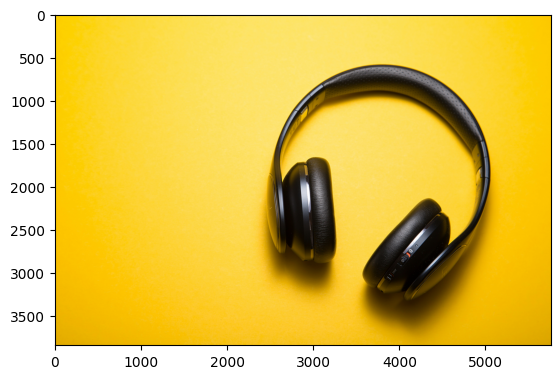

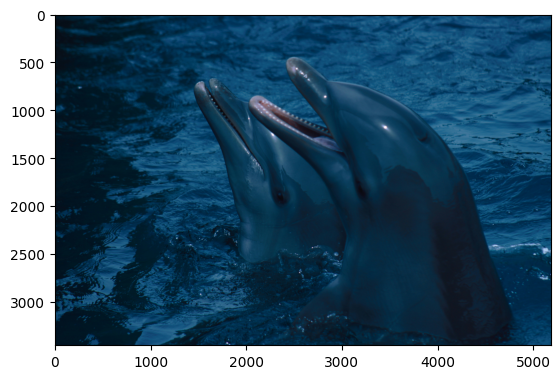

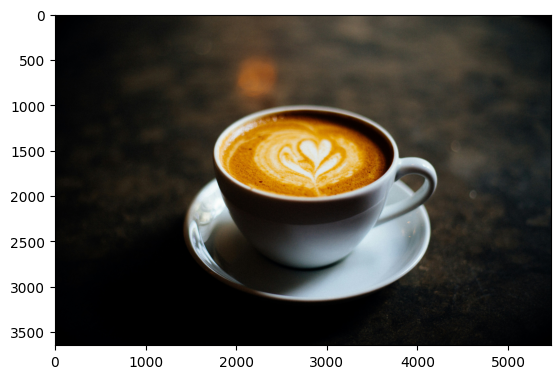

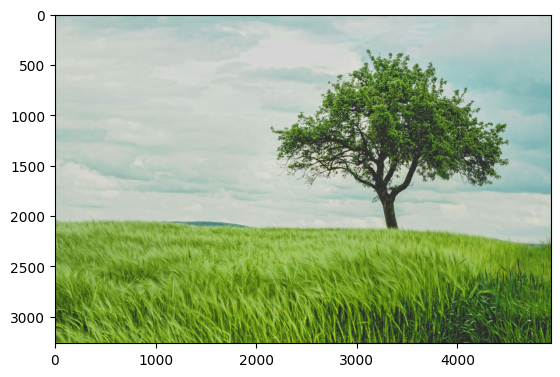

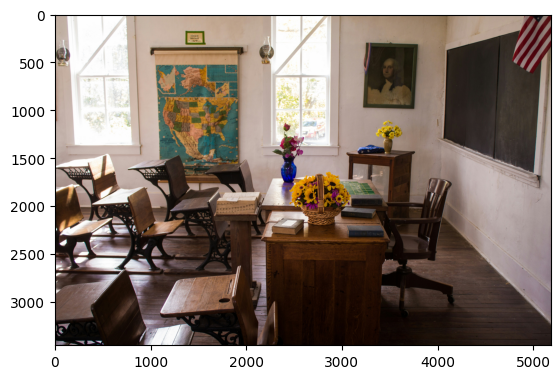

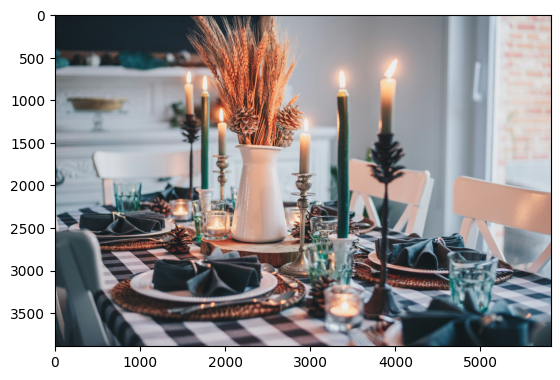

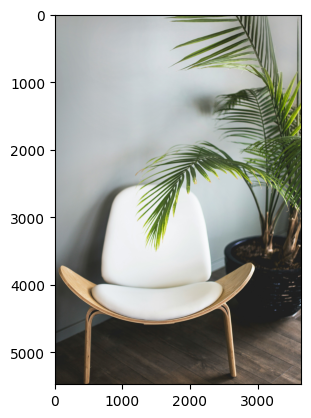

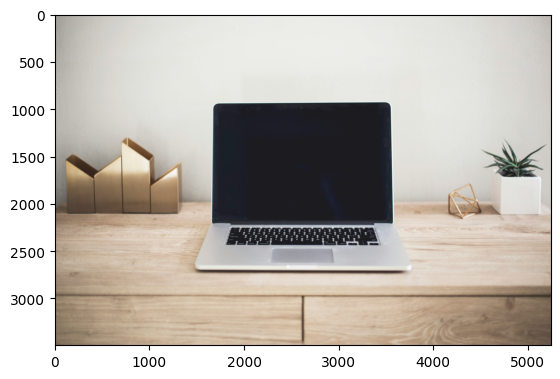

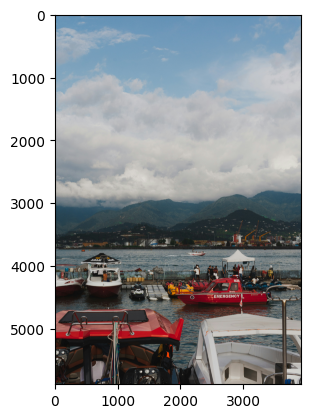

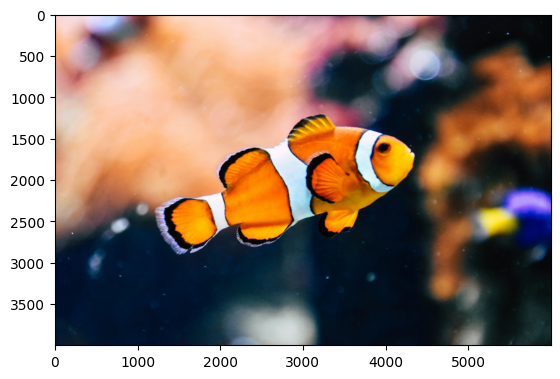

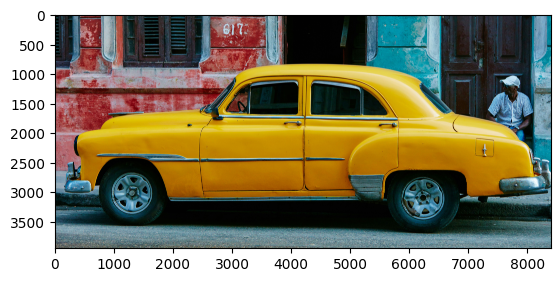

In [54]:
# Display each image
for image in images:
  plt.show( plt.imshow(np.asarray(image)))

In [55]:
!pip install transformers==4.28.1

In [56]:
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base", torch_dtype=torch.float16).to("cuda")

In [57]:
for image_file in os.listdir(image_folder):
  if image_file.lower().endswith(('.png', '.jpg', '.jpeg','avif')):
    image_path = os.path.join(image_folder, image_file)

    raw_image = Image.open(image_path).convert('RGB')

    inputs = processor(raw_image, return_tensors="pt").to("cuda")

    out = model.generate(**inputs)
    print(processor.decode(out[0], skip_special_tokens=True))

a view of the ocean and a sandy beach
a girl in a pink shirt is playing soccer
a black backpack sitting on the ground
a man holding a cell phone with a map on it
a pair of headphones on a yellow background
two dolphins in the water
a cup of coffee with a heart drawn on it
a lone tree in a field of tall grass
a classroom with a blackboard and desks
a table set with black and white plaid tablecloth, candles, and a vase with wheat
a white chair with a plant in it
a laptop on a wooden desk with a plant
the clouds are white
a clown fish swimming in a tank
a yellow car parked in front of a building


In [58]:
from transformers import CLIPProcessor, CLIPModel
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Load the model and processor
model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32')
processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')

a fish


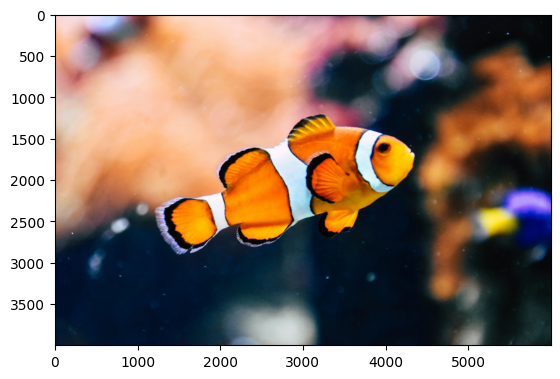

In [61]:
captions = ["a fish"]

print(captions[0])

inputs = processor(
    text=captions, images=images,
    return_tensors='pt', padding=True
)


outputs = model(**inputs)


image_features = outputs.image_embeds
text_features = outputs.text_embeds

#cosine similarity
similarity = F.cosine_similarity(text_features.unsqueeze(1), image_features.unsqueeze(0), dim=-1)

#index of the closest image
closest_image_index = similarity.argmax().item()

plt.show(plt.imshow(np.asarray(images[closest_image_index])))